<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(y_hat)_0_3_0_7_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.646644,31.976836,24.262009,0.186627,143.072116,143.145731,-0.073615
1,0.0,1.0,98.702981,57.310285,28.504874,0.346475,194.864615,194.569445,0.295169
2,0.0,2.0,77.702075,84.550526,60.432815,-0.619202,232.066214,232.630251,-0.564037
3,0.0,3.0,65.438999,93.133392,53.128515,-0.912111,220.788795,221.525546,-0.736751
4,0.0,4.0,78.335336,46.258512,60.726744,0.464749,195.785342,195.625596,0.159745
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,53.454513,98.076103,96.972742,1.047806,259.551164,258.735437,0.815728
29996,999.0,26.0,48.070515,22.159605,48.634195,0.735642,129.599957,128.805494,0.794462
29997,999.0,27.0,40.936491,87.233058,37.085119,1.563551,176.818219,175.590765,1.227454
29998,999.0,28.0,35.752788,76.208678,28.715799,-0.870418,149.806847,150.958320,-1.151473


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.646644,31.976836,24.262009,0.186627,143.072116,143.145731,-0.073615
1,0.0,1.0,98.702981,57.310285,28.504874,0.346475,194.864615,194.569445,0.295169
2,0.0,2.0,77.702075,84.550526,60.432815,-0.619202,232.066214,232.630251,-0.564037
3,0.0,3.0,65.438999,93.133392,53.128515,-0.912111,220.788795,221.525546,-0.736751
4,0.0,4.0,78.335336,46.258512,60.726744,0.464749,195.785342,195.625596,0.159745
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,53.454513,98.076103,96.972742,1.047806,259.551164,258.735437,0.815728
29996,999.0,26.0,48.070515,22.159605,48.634195,0.735642,129.599957,128.805494,0.794462
29997,999.0,27.0,40.936491,87.233058,37.085119,1.563551,176.818219,175.590765,1.227454
29998,999.0,28.0,35.752788,76.208678,28.715799,-0.870418,149.806847,150.958320,-1.151473


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.646644  31.976836  24.262009  ...  143.072116  143.145731 -0.073615
      1.0    98.702981  57.310285  28.504874  ...  194.864615  194.569445  0.295169
      2.0    77.702075  84.550526  60.432815  ...  232.066214  232.630251 -0.564037
      3.0    65.438999  93.133392  53.128515  ...  220.788795  221.525546 -0.736751
      4.0    78.335336  46.258512  60.726744  ...  195.785342  195.625596  0.159745
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   53.454513  98.076103  96.972742  ...  259.551164  258.735437  0.815728
      26.0   48.070515  22.159605  48.634195  ...  129.599957  128.805494  0.794462
      27.0   40.936491  87.233058  37.085119  ...  176.818219  175.590765  1.227454
      28.0   35.752788  76.208678  28.715799  ...  149.806847  150.958320 -1.151473
      29.0   55.455999  65.545011  88.049475  ...  219.974108  219.132333  0.841775

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.646644  31.976836  24.262009  ...  143.072116  143.145731 -0.073615
      1.0    98.702981  57.310285  28.504874  ...  194.864615  194.569445  0.295169
      2.0    77.702075  84.550526  60.432815  ...  232.066214  232.630251 -0.564037
      3.0    65.438999  93.133392  53.128515  ...  220.788795  221.525546 -0.736751
      4.0    78.335336  46.258512  60.726744  ...  195.785342  195.625596  0.159745
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   53.454513  98.076103  96.972742  ...  259.551164  258.735437  0.815728
      26.0   48.070515  22.159605  48.634195  ...  129.599957  128.805494  0.794462
      27.0   40.936491  87.233058  37.085119  ...  176.818219  175.590765  1.227454
      28.0   35.752788  76.208678  28.715799  ...  149.806847  150.958320 -1.151473
      29.0   55.455999  65.545011  88.049475  ...  219.974108  219.132333  0.841775

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.646644,31.976836,24.262009,0.186627,143.072116,143.145731,-0.073615
1,0.0,1.0,98.702981,57.310285,28.504874,0.346475,194.864615,194.569445,0.295169
2,0.0,2.0,77.702075,84.550526,60.432815,-0.619202,232.066214,232.630251,-0.564037
3,0.0,3.0,65.438999,93.133392,53.128515,-0.912111,220.788795,221.525546,-0.736751
4,0.0,4.0,78.335336,46.258512,60.726744,0.464749,195.785342,195.625596,0.159745
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,53.454513,98.076103,96.972742,1.047806,259.551164,258.735437,0.815728
29996,999.0,26.0,48.070515,22.159605,48.634195,0.735642,129.599957,128.805494,0.794462
29997,999.0,27.0,40.936491,87.233058,37.085119,1.563551,176.818219,175.590765,1.227454
29998,999.0,28.0,35.752788,76.208678,28.715799,-0.870418,149.806847,150.958320,-1.151473


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.646644  31.976836  24.262009  ...  143.072116  143.145731 -0.073615
      1.0    98.702981  57.310285  28.504874  ...  194.864615  194.569445  0.295169
      2.0    77.702075  84.550526  60.432815  ...  232.066214  232.630251 -0.564037
      3.0    65.438999  93.133392  53.128515  ...  220.788795  221.525546 -0.736751
      4.0    78.335336  46.258512  60.726744  ...  195.785342  195.625596  0.159745
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   53.454513  98.076103  96.972742  ...  259.551164  258.735437  0.815728
      26.0   48.070515  22.159605  48.634195  ...  129.599957  128.805494  0.794462
      27.0   40.936491  87.233058  37.085119  ...  176.818219  175.590765  1.227454
      28.0   35.752788  76.208678  28.715799  ...  149.806847  150.958320 -1.151473
      29.0   55.455999  65.545011  88.049475  ...  219.974108  219.132333  0.841775

[30000 rows x 7 columns]

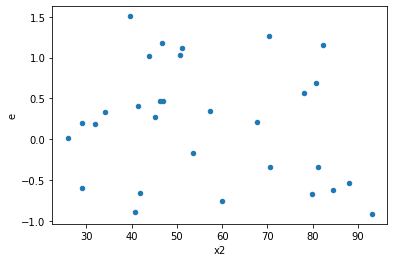

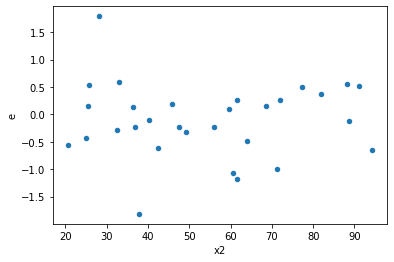

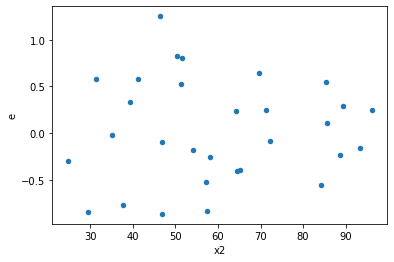

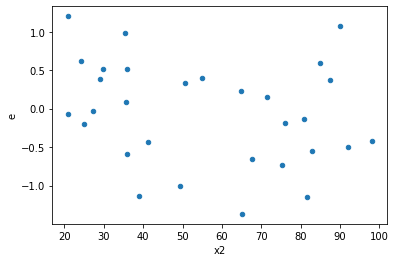

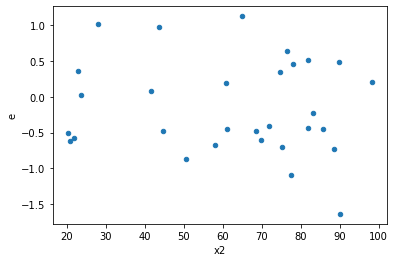

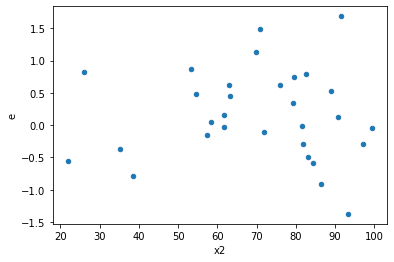

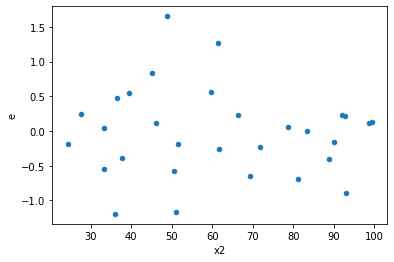

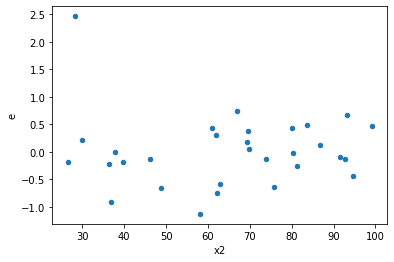

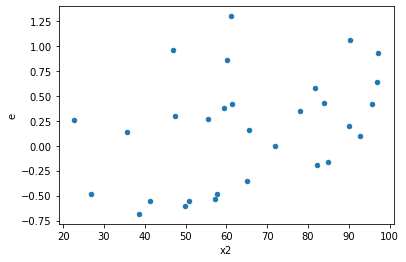

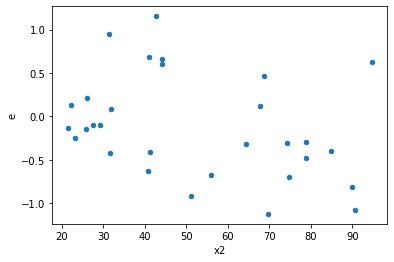

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,9.0,9.0,3.7418745230164507,4.146297076597229,0.41576383589071675,0.46069967517746985,1.1080802018061149,0.8809992168667808,0.5595003915666096,0.4404996084333904,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,2.159459810992235,3.9162616950138673,0.23993997899913724,0.43514018833487417,1.8135376611683325,0.3884662617912711,0.8057668691043645,0.19423313089563554,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,1.7316607569274105,2.543769366316907,0.19240675076971228,0.28264104070187857,1.4689767358535453,0.5758798086762984,0.7120600956618508,0.2879399043381492,Reject001=1 : Homoscedasticity
11.0,9.0,9.0,3.657208392964699,3.9386042158206993,0.4063564881071888,0.43762269064674436,1.076942791501112,0.9138866987535792,0.5430566506232104,0.4569433493767896,Reject001=1 : Homoscedasticity
12.0,9.0,9.0,5.477507118819209,5.996425236951312,0.6086119020910232,0.666269470772368,1.0947361832446083,0.8949556720607572,0.5525221639696214,0.4474778360303786,Reject001=1 : Homoscedasticity
15.0,9.0,9.0,2.4457332301089476,7.73667249547394,0.27174813667877196,0.8596302772748822,3.163334578043617,0.10137787274891452,0.9493110636255427,0.05068893637445726,Reject001=1 : Homoscedasticity
18.0,9.0,9.0,4.325337776231249,4.419198159534672,0.4805930862479166,0.4910220177260747,1.0217001279805724,0.9750132810658436,0.5124933594670782,0.4875066405329218,Reject001=1 : Homoscedasticity
20.0,9.0,9.0,3.7417095735062027,3.8164803995031895,0.41574550816735584,0.4240533777225766,1.0199830651011543,0.9769703765111992,0.5115148117444004,0.4884851882555996,Reject001=1 : Homoscedasticity
22.0,9.0,9.0,3.8374267887887274,3.8588034849801107,0.4263807543098586,0.42875594277556783,1.0055705808522097,0.9935333304190854,0.5032333347904573,0.4967666652095427,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,2.9274156340237703,2.2684542672743775,0.32526840378041894,0.2520504741415975,0.7748999632677228,0.7102013630748972,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,3.7907323183393156,1.2874007343232932,0.4211924798154795,0.14304452603592147,0.339617948778639,0.12339123607377074,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,3.40896198082922,3.2006674160782094,0.3787735534254689,0.35562971289757883,0.9388979501905903,0.9267142107820175,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,3.7418745230164507,4.146297076597229,0.41576383589071675,0.46069967517746985,1.1080802018061149,0.8809992168667808,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,2.3734934962578147,1.7799545344206782,0.26372149958420166,0.197772726046742,0.7499302345791365,0.6750987087272037,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,2.159459810992235,3.9162616950138673,0.23993997899913724,0.43514018833487417,1.8135376611683325,0.3884662617912711,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,6.12343660400198,3.199338979724478,0.6803818448891089,0.35548210885827536,0.5224744186350433,0.3475985957458836,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,4.756264811091939,2.810795191230371,0.5284738678991043,0.31231057680337454,0.5909669252804011,0.4453487730940823,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,1.7316607569274105,2.543769366316907,0.19240675076971228,0.28264104070187857,1.4689767358535453,0.5758798086762984,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      977
Reject001=0 : Heteroscedasticity     23
Name: Result_test, dtype: int64